
# CENG 384 - Programming Assignment

In this homework, you will display and analyze sound signals in the time domain and in the frequency domain. The tasks and explanations are provided in the form of a Jupyter Notebook file, which you can download from <a 
href="https://colab.research.google.com/drive/19TGCQ1FdgSVQNX1PFnKhoS3uxSoJ_UnB">here</a>. To see it with the drawings, you should run it in the directory you can download from the COW page of the course.

### Sound samples and the Python file

The sound samples that you can use in this assignment and a Python starter file are provided to you at the COW page of the course.

### Submission instructions

Run file `collect_submission.sh`, which will create you a `ceng384_pHW.zip` file. Upload this file at the COW page of the course.
  
### Deadline

17th of May, 23:55
  
### Testing Environment

Your solutions will be tested on inek machines (running Ubuntu 18.04) with  Python v2.7. For the libraries, minimum requirements are: Numpy v1.11 , Matplotlib v1.5.1, Scipy 0.17.

In [1]:
# Some setup utils
import numpy as np
import matplotlib.pyplot as plt
import scipy

%matplotlib inline
plt.rcParams['figure.figsize'] = (10.0, 8.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

# for auto-reloading external modules
# see http://stackoverflow.com/questions/1907993/autoreload-of-modules-in-ipython
%load_ext autoreload
%autoreload 2

# Warm-up: Generating, Plotting and Analyzing a Simple Signal

Let us start warming up by generating a simple signal with the numpy library (check <a href="https://docs.scipy.org/doc/numpy/user/quickstart.html">this</a> for a tutorial). Numpy is a very talented library for working with numerical data structures, like complex numbers, vectors, matrices etc.

In the following cell, we will first construct a simple continuous-time signal:
$$x(t) = \cos(2\pi t) + \sin(40\pi t).$$

For plotting the signal, we will use the matplotlib library (check <a href="https://matplotlib.org/users/pyplot_tutorial.html">this</a> for a tutorial).

Text(0.5,1,'$x(t) = \\cos(2\\pi t) + \\sin(40\\pi t)$')

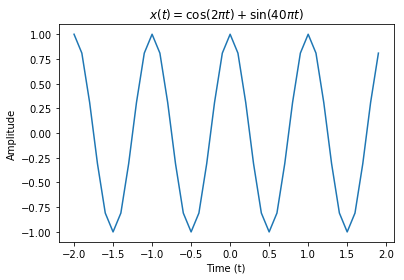

In [3]:
t = np.arange(-2, 2, .1) # Sample a time interval between -2 and 2
x = np.cos(2*np.pi*t)+np.sin(40*np.pi*t)

plt.plot(t, x)
plt.xlabel('Time (t)')
plt.ylabel('Amplitude')
plt.title('$x(t) = \cos(2\pi t) + \sin(40\pi t)$')

See, that's very easy. You can just construct any signal in this manner and plot it.

In the previous step, we actually constructed a discrete-time signal and drew that as if it were a continuous-time signal. Now, let us directly work with a discrete-time signal.

In the following cell, we will construct and plot a simple discrete-time signal:
$$x[n] = \cos[0.1 \pi n].$$

(-1.2, 1.2)

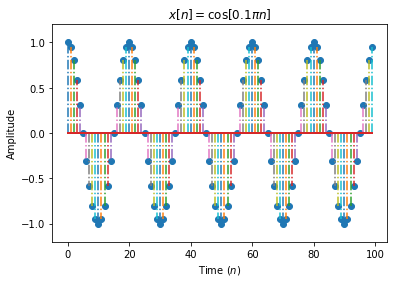

In [4]:
n = np.array(range(0, 100)) 
# np.linspace(0.1, 2*np.pi, 10)
markerline, stemlines, baseline = plt.stem(n, np.cos(0.1 * np.pi * n), '-.')
plt.setp(baseline,'linewidth', 2)
plt.xlabel('Time ($n$)')
plt.ylabel('Amplitude')
plt.title('$x[n]=\cos[0.1 \pi n]$')
plt.ylim(-1.2, 1.2)

Nice! So colorful and periodic :)

# Serious Stuff: Load and Plot a WAV file

A standard format for storing audio/sound signals is the Waveform Audio Format (WAV in short -- see <a href="https://en.wikipedia.org/wiki/WAV">here</a> for more info). Don't worry, we will not ask you to load a WAV file from scratch. In the following step, we provide you a routine for loading and plotting a WAV file. 

Under `"./sound_samples"` directory, there are many other sound samples. Load them and check how they look.

Sound() is finishing with:
	 source file:  sound_samples/cat.wav
	 sampling rate (Hz):  44100
	 duration (s):  5.06777777778
	 number of samples:  223489


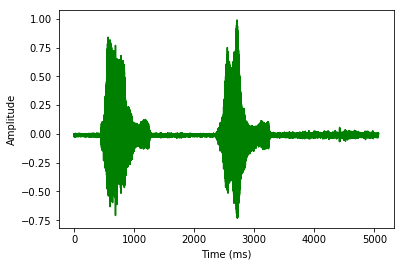

In [10]:
from ceng384_prog_hw import *

filename = 'sound_samples/cat.wav'

# Create a Sound object
signal = Sound(filename, verbose=True)

# Let us plot our signal
signal.plot_sound()

# The Discrete Fourier Transform

The sound signal that you have just loaded and plotted is a discrete-time, finite-interval signal. We can transform such signals into the frequency domain using Discrete Fourier Transform, defined as follows:

$$
X[k] = \displaystyle\sum_{n = 0}^{N-1}x[n] e^{-jk\frac{2\pi}{N}n}  ,  \quad\quad   k = 0,1,2,...,N-1
$$

where $N$ is the length (the number of samples) of our signal $x$.

# Task 1: Implement Fourier Transform

Open file `"ceng384_prog_hw.py"` and complete the implementation of function "dft". 

In [8]:
signal = Sound(filename)

# Let us test your function with the first 100 values of the sound signal
x = signal.data[0:100] 
dft_naive = dft(x)

### Check your implementation
Using the Fast Fourier Transform (FFT) implementation of the Numpy library, let us check how good your implementation was.

In [11]:
# FFT from Numpy:
tic()
dft_fast = np.fft.fft(x)
toc()
tic()
dft_naive = dft(x) # No need to recalculate, but let's repeat it just for clarity
toc()

# You should see a total difference less than 10^-10
error = 0
for i in range(len(dft_naive)):
    error += np.abs(dft_naive[i]-dft_fast[i])
print "The difference (Euclidean distance) is: ", error
print "Your are good to go!" if error < 10**-10 else "FAILED! Your implementation has too much error. Go back and check for errors"

Elapsed time is 0.000189065933228 seconds.
Elapsed time is 0.039391040802 seconds.
The difference (Euclidean distance) is:  1.662564770772386e-13
Your are good to go!


# Spectograms

Since sound signals can be too long, composed of many small-segment units of sounds, analyzing a whole sound signal with a single set of spectrum is not practical. A good spectral tool for sound signals is to use a spectogram. 

A spectogram is essentially a matrix composed of DFT of small intervals of the input. Formally, the spectogram $\mathcal{S}\{x[n]\}$ can be calculated as follows:

$$\mathcal{S}\{x[n]\}[i] = \mathcal{F}\{x[i\times s:i\times s+W]\},$$

where $W$ is the length of the interval for which we are calculating the DFT, and $\mathcal{F}\{x[n]\}$ is the DFT of $x[n]$. This is illustrated in the following drawing.

<img src="spectogram_sekil.png" width="50%">

According to this definition, $\mathcal{S}[0]$ is a vector composed of the DFT of $x[0:W-1]$, and $\mathcal{S}[1]$ is then the DFT of $x[s:s+W-1]$. 

The "jump" amount between window positions, $s$, is called the stride.

# Task 2: Calculate Spectogram

Open file `"ceng384_prog_hw.py"` again and complete the implementation of function "calculate_spectogram". Note that the function takes a DFT calculating function as an argument. When you pass your dft() function as an argument, you will realize that it is very very slow. To speed things up, we will continue with the FFT function from numpy.

In [13]:
window_size = 500
stride = 100
x = signal.data
Fs = signal.sampling_rate 
duration = signal.duration

tic()
S = calculate_spectogram(x, window_size=window_size, stride=stride, dft_function=np.fft.fft)
toc()

# Let's print the shape of spectogram just to make things clear
print "S.shape: ", S.shape

Elapsed time is 0.0667970180511 seconds.
S.shape:  (2229, 500)


## Plotting the Spectograms

Now let us plot the spectogram. For visualization purposes, we will do many tricks:

1) Since the Fourier Transform is complex, we will just look at the magnitude.

2) Since the Discrete Fourier Transform is symmetric, we will just visualize a half.

3) We will use a logarithmic scale (in terms of decibels) for the magnitude, to better see the whole range.

Although these steps make the main frequencies/components more visible, they may also exaggerate the small components which may appear as artifacts.

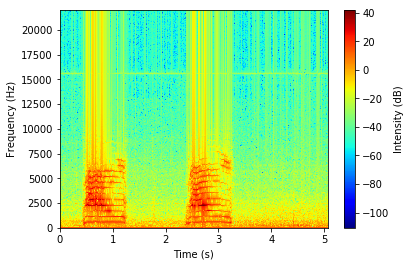

In [14]:
plot_spectogram(S, stride, window_size, duration=duration, Fs=Fs)

# Analyze some signals

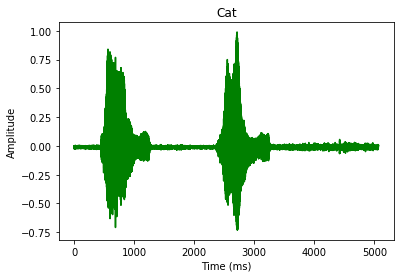

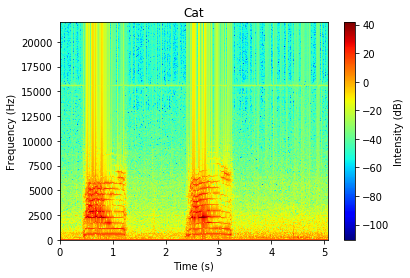

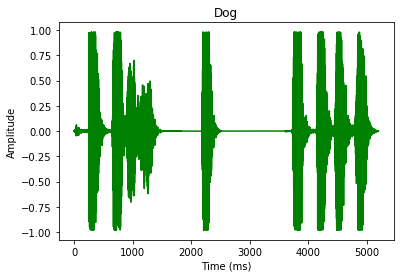

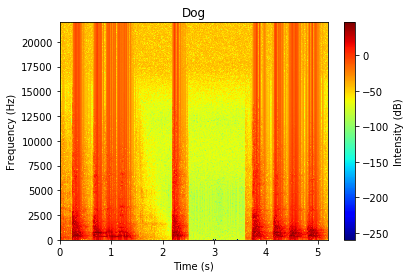

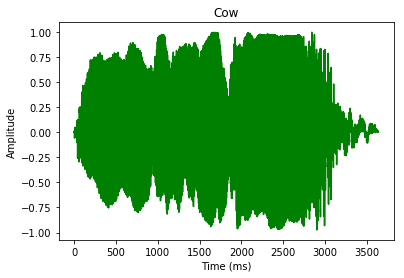

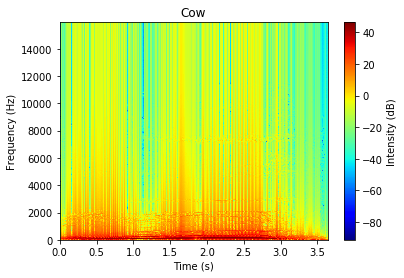

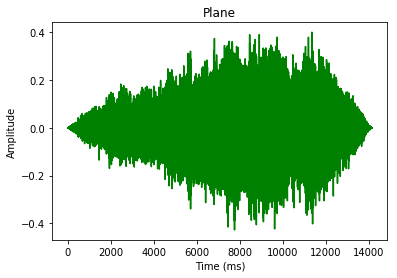

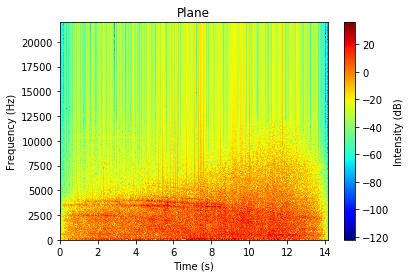

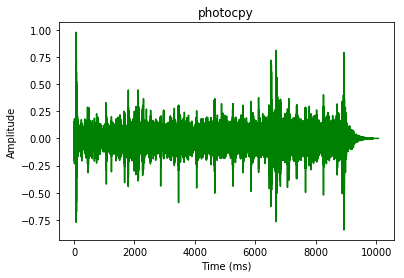

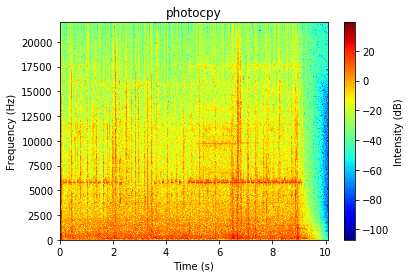

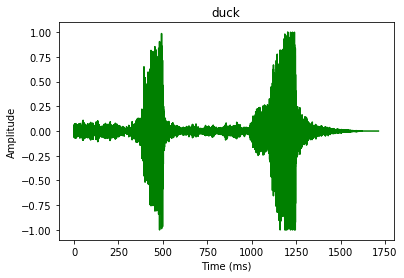

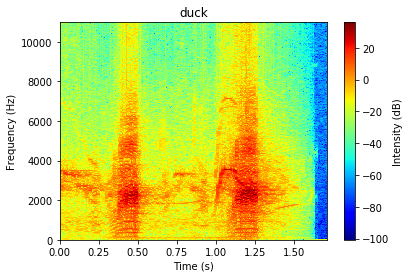

In [19]:
def analyze_sound(filename, name):
    signal = Sound(filename)
    signal.plot_sound(name)
    x = signal.data
    Fs = signal.sampling_rate
    duration = signal.duration
    
    S = calculate_spectogram(x, window_size=window_size, stride=stride, dft_function=np.fft.fft)
    plot_spectogram(S, stride, window_size, duration=duration, Fs=Fs, name=name)

window_size = 500
stride = 100

# Cat sound
cat_sound_filename = 'sound_samples/cat.wav'
analyze_sound(cat_sound_filename, "Cat")

# Dog sound
cow_sound_filename = 'sound_samples/dog.wav'
analyze_sound(cow_sound_filename, "Dog")

# Cow sound
cow_sound_filename = 'sound_samples/cow.wav'
analyze_sound(cow_sound_filename, "Cow")

plane = 'sound_samples/airplane.wav'
analyze_sound(plane, "Plane")

x = 'sound_samples/photocopy.wav'
analyze_sound(x, "photocpy")

y = 'sound_samples/duck.wav'
analyze_sound(y, "duck")


Let's look at a human sound sample

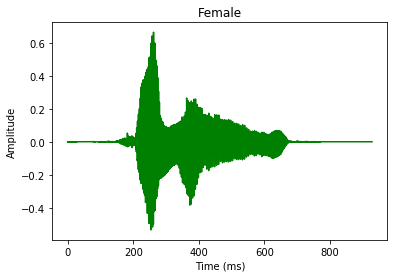

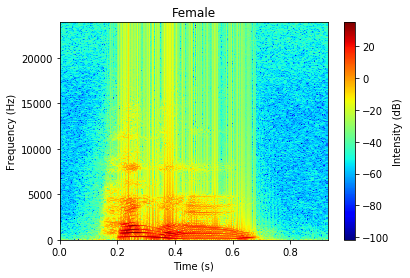

In [10]:
# Female hello sound
female_sound_filename = 'sound_samples/hello_female.wav'
analyze_sound(female_sound_filename, "Female")

# Task 3: Discussion

1) What do you see in the time domain for the sample sounds that you have analyzed above?

  Sounds are sampled at 44100 Hz and number of samples are 44100*duration of sound file. Each sample has a value that represents amplitude of the sound signal. By taking values of these discrete samples, 2D amplitude versus time graphs can be plotted. Thus, data of corresponding time values in the graph are nothing but the amplitude of the sound at that time.
  It is known that strength of the sound at a time point is related to amplitude of the signal at coincident point. When these graphs are analyzed, it can be clearly seen that increasing points of amplitudes are time points where sound source increases volume of voice.If sounds are listened carefully, sharp rises occur when sound source starts to emphasize its sound(strength of sound is increased) and sharp falls occur when source stops(strength of sound is decreased). Let us analyze some given sound samples individually or in a group and check these sounds' graphs according to general analysis above.
  Female(sound created only once in time interval): İnitially volume of sound is almost 0(we are not hearing any sound until female starts) and this situation is exactly same after the "hello" sound. These parts of graphs fit with general analysis since strength of the sound signal is really small. When she starts to create sound, a sharp rise in the amplitude of graph at that point in order to show that a realtively strong sound signal is exist.
  Cat-Dog-Duck(sounds created several times): In these sounds, cat meows 2 times, dog barks several times and duck emphasizes its sound 2 times. What can be seen here is that, when these animals starts to create sounds, their corresponding graphs are rising amplitude values. Time intervals that are between creation of sounds, amplitudes of graphs are relatively small and this situation is fit with our discussion in the above.
  Cow-Photocopy-Plane(sound is nearly continuous): The difference in these sound samples from other sounds is that sound spans whole sample in that time interval.This lead to think us that amplitudes of nearly all time points are relatively high and graphs should have bigger values.This is exactly complies plots of these sounds.
  
  
    

2) What do you see in the frequency domain for the sample sounds that you have analyzed above?

...write your answer here...